In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv('SalaryData.csv')

In [4]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 560.0 bytes


In [7]:
# let take salary to be predicted from year of experience
y = dataset['Salary']

In [8]:
x = dataset['YearsExperience']

In [9]:
type(x)

pandas.core.series.Series

In [10]:
# reshape x into 2D array 
X = x.values.reshape(30,1)

In [11]:
type(X)

numpy.ndarray

In [13]:
X.shape

(30, 1)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [16]:
# we need linear regression beacuse it is continuous data
from sklearn.linear_model import LinearRegression

In [17]:
# model be like ... y = b + cx b=bias c=weight/coefficient
model = LinearRegression()

In [18]:
# train model by fit function

# Linear regression is using MAE (mean absolute error) to fing best fit
# min error is best
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
y_pred = model.predict(X_test)

In [21]:
y_test

27    112635.0
15     67938.0
23    113812.0
17     83088.0
8      64445.0
9      57189.0
28    122391.0
24    109431.0
12     56957.0
0      39343.0
Name: Salary, dtype: float64

In [30]:
# to check the value of MAE 
from sklearn import metrics

In [31]:
# close to zero is best: ideal case 
metrics.mean_absolute_error(y_test,y_pred)

4956.5232614449005

In [32]:
metrics.mean_squared_error(y_test,y_pred)

35301898.887134895

In [12]:
z = model.predict([[1.1]])

In [13]:
z

array([36187.15875227])

In [14]:
z[0]

36187.15875226929

In [15]:
model.coef_ # it tells the value of coefficient in our case it is c

array([9449.96232146])

In [16]:
model.intercept_ # it tells the value of bias in our case it is b

25792.20019866871

In [17]:
# now lets save the model as we don't want to run the program again n again
from sklearn.externals import joblib

E:\Anaconda 3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [18]:
joblib.dump(model,'salary_model.pk1')

['salary_model.pk1']

In [24]:
# lets plot a graph
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

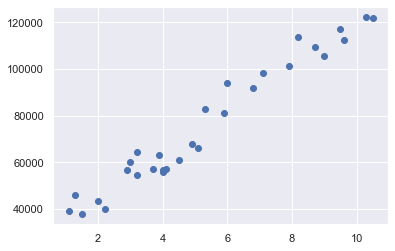

In [25]:
plt.scatter(X,y)

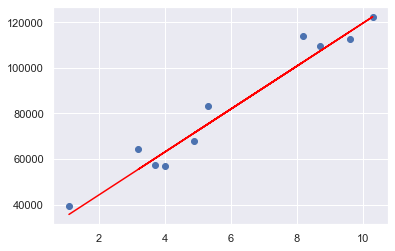

In [29]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred,color='red')